# Importation des bibliothèques

In [ ]:
import sys
sys.path.insert(0, '..')


In [ ]:
%load_ext autoreload
%autoreload 2
from modele import Module_lineare , Softmax ,TanH , Sigmoide
from sequentiel import Sequentiel , Optim
from loss  import MSELoss , CELoss , BCELoss
import utils as ut
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.datasets import mnist

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [3]:
uspsdatatrain = "./data/USPS_train.txt"
uspsdatatest = "./data/USPS_test.txt"
alltrainx,alltrainy = ut.load_usps(uspsdatatrain)
alltestx,alltesty = ut.load_usps(uspsdatatest)

alltrainy , alltesty = alltrainy.reshape(-1,1) , alltesty.reshape(-1,1)

print('Train_X :', alltrainx.shape)
print('Train_y :', alltrainy.shape)
print()
print('Test_X :', alltestx.shape)
print('Test_y :', alltesty.shape)

Train_X : (7291, 256)
Train_y : (7291, 1)

Test_X : (2007, 256)
Test_y : (2007, 1)


# Expérimentations

## Apprentissage avec des donnéess non-bruitées

### Création du modéle auto_encodeur 1

## Éxperimentation sur la reconstruction des images : 

In [6]:
input_size = alltrainx.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network = Sequentiel(auto_encodeur)


optimiser = Optim(network,loss,eps=1e-3)

print(optimiser._net)

In [13]:
batch_size = 10
epochs = 100

losses = optimiser.SGD(alltrainx, alltrainx, batch_size, epochs)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


#### Visualisation de le prediction des données Test 

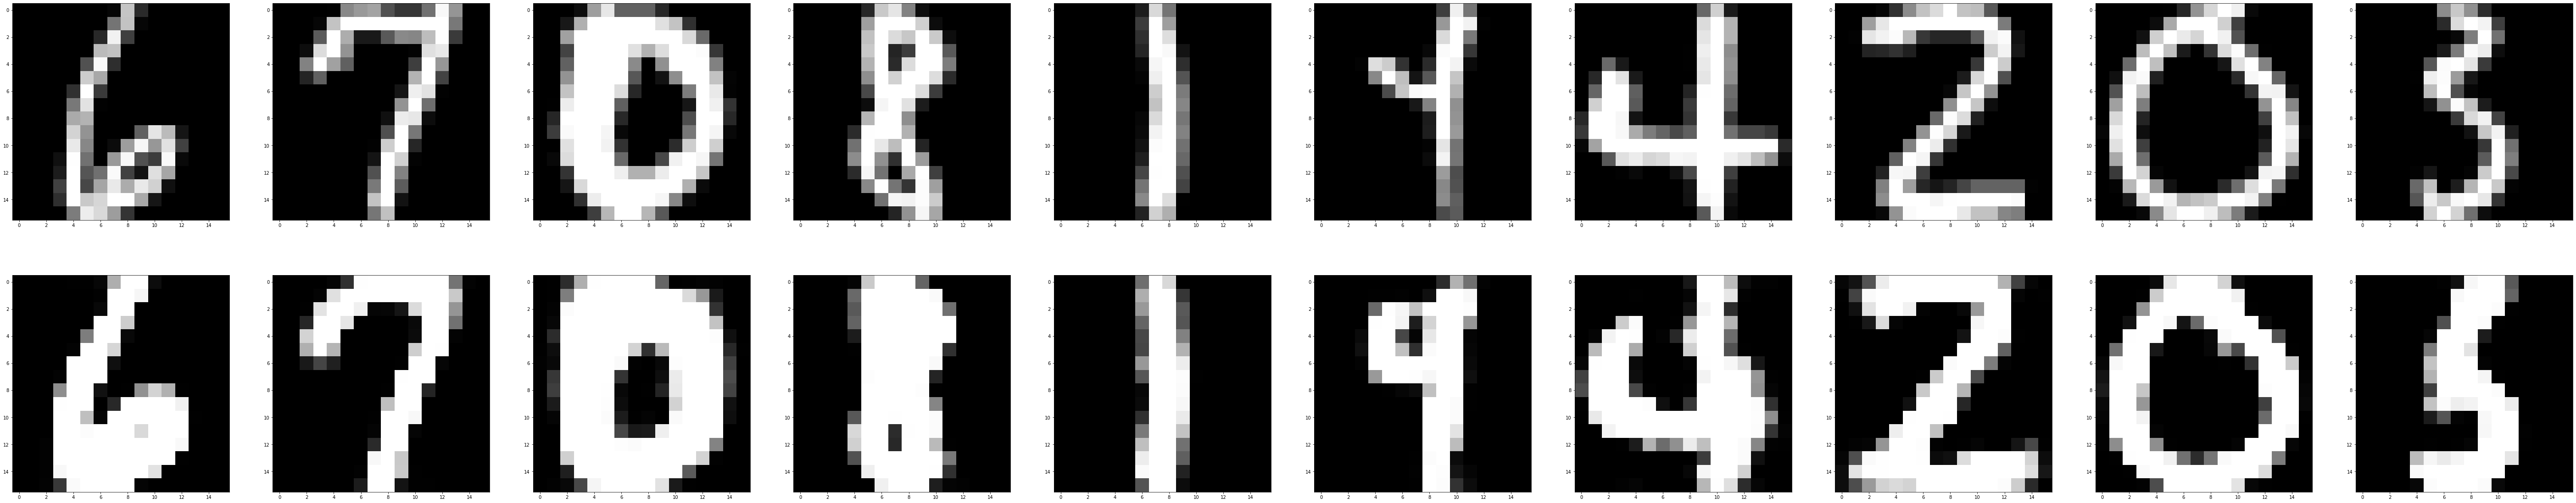

In [16]:
nb_examples = 10
index = np.random.choice(np.arange(alltestx.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps(alltestx[i])

    plt.subplot(2,10,j+10)
    ut.show_usps(optimiser._net.forward(np.asarray([alltestx[i]])))
    
    j+=1

### Variation de la taille des sorties : 

In [17]:
input_size = alltrainx.shape[1]
hidden_1 = 100
output_size = 10



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network_2 = Sequentiel(auto_encodeur)


optimiser = Optim(network_2,loss,eps=1e-3)

print(optimiser._net)

In [18]:
batch_size = 10
epochs = 100

optimiser.SGD(alltrainx, alltrainx, batch_size, epochs)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


[-103.92900122586435,
 -204.30363038502543,
 -230.27164499104714,
 -238.9017537553711,
 -231.50040235437464,
 -187.73299813797726,
 -130.785788952072,
 -107.44826202848682,
 -81.62297964777395,
 -91.78986957421534,
 -88.87856849113123,
 -72.81766823615142,
 -37.260320239194925,
 -32.1230207419512,
 37.755596538424804,
 11.193338283798818,
 33.97968003537275,
 63.02842619906055,
 61.96142230054473,
 61.33274365525429,
 60.85307146804456,
 60.46554712006104,
 60.141141372137064,
 59.862810614778965,
 59.619624064752465,
 59.40412440615318,
 59.21098436857769,
 59.03625947759092,
 58.87694355572125,
 58.730689942595596,
 58.595628965196816,
 58.470244033799894,
 58.35328481815923,
 58.243704656038844,
 58.1406141386698,
 58.04324558296142,
 57.95092481840036,
 57.863047559953586,
 57.779058096902205,
 57.69842794626489,
 57.620631303919154,
 57.54511219769833,
 57.471233361366295,
 57.39818438743893,
 57.324791086999255,
 57.24904522780213,
 57.1666128535905,
 57.06311807415031,
 56.67193

#### Visualisation de le prediction des données Test 

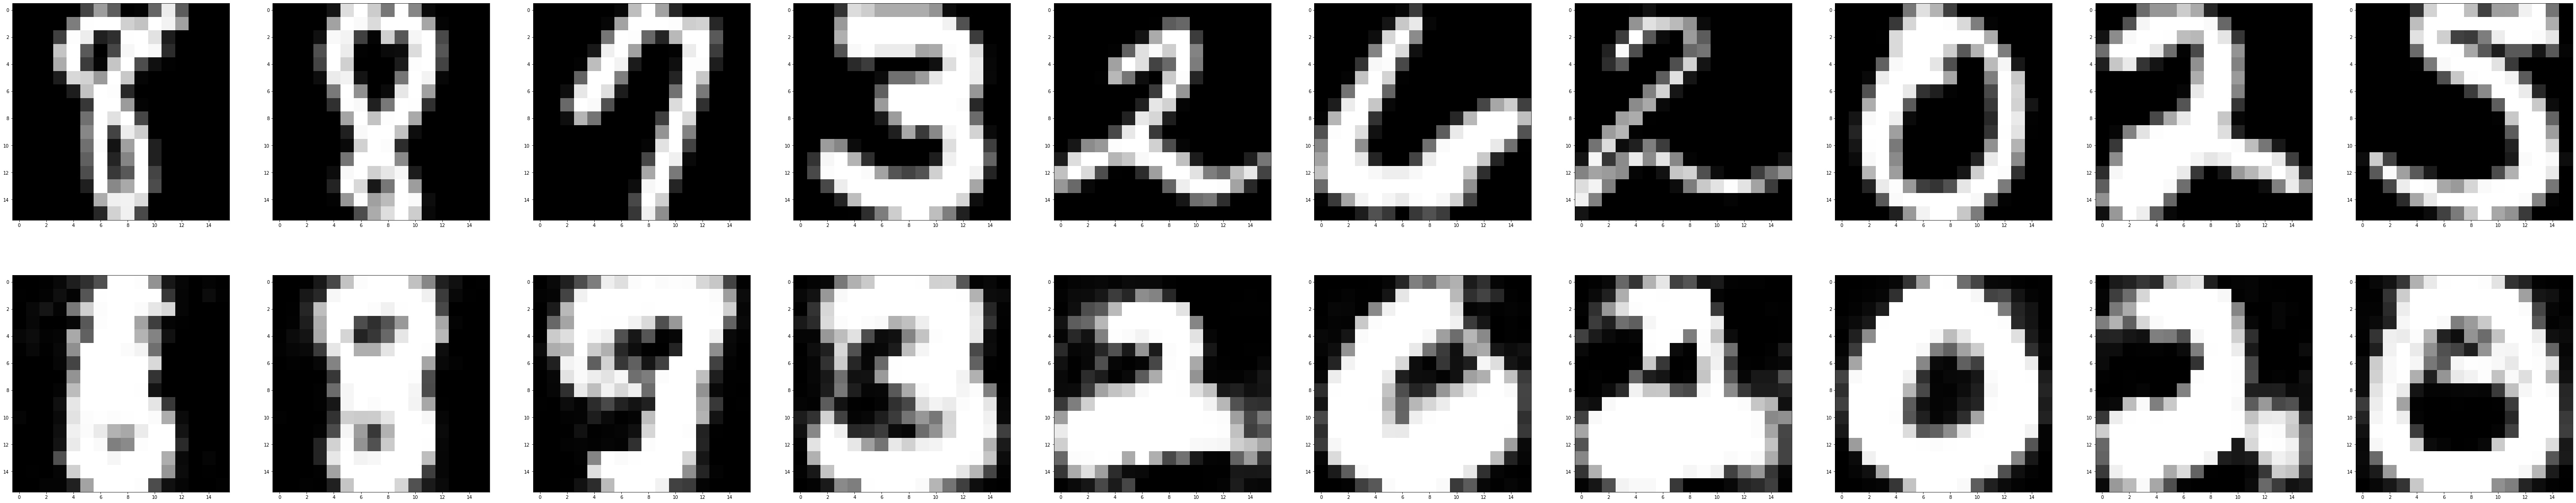

In [19]:
nb_examples = 10
index = np.random.choice(np.arange(alltestx.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps(alltestx[i])

    plt.subplot(2,10,j+10)
    ut.show_usps(optimiser._net.forward(np.asarray([alltestx[i]])))
    
    j+=1

### Variation du nombre de couches: 

In [20]:
input_size = alltrainx.shape[1]
hidden_1 = input_size//2
hidden_2 = hidden_1//2
output_size = hidden_2//2

module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, hidden_2,True)
module_3 = Module_lineare(hidden_2, output_size,True)


module_4 = Module_lineare(output_size, hidden_2,True)
module_4._parameters['weights'] = module_3._parameters['weights'].T
module_5 = Module_lineare(hidden_2, hidden_1,True)
module_5._parameters['weights'] = module_2._parameters['weights'].T

module_6 = Module_lineare(hidden_1, input_size,True)
module_6._parameters['weights'] = module_1._parameters['weights'].T



tan_1 = TanH()
tan_2 = TanH()
tan_3 = TanH()

tan_4 = TanH()
tan_5 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2,module_3,tan_3]
Decodeur = [module_4,tan_4,module_5,tan_5,module_6,sigmoide]

auto_encodeur = Encodeur + Decodeur
network = Sequentiel(auto_encodeur)


optimiser = Optim(network,loss,eps=1e-3)

print(optimiser._net)

In [21]:
batch_size = 10
epochs = 100

optimiser.SGD(alltrainx, alltrainx, batch_size, epochs)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


[-178.0226864727672,
 -282.8437827532,
 -238.07270550517364,
 -56.42068800397323,
 -33.436892508359236,
 35.72473519478352,
 55.23748767724188,
 56.41654707841238,
 56.138791370948844,
 55.95036060569167,
 55.80581853532851,
 55.68813270574102,
 55.58877941433122,
 55.50281555209766,
 55.427095439632254,
 55.3594833866473,
 55.29845820060813,
 55.242895478071404,
 55.19193922736688,
 55.14492192669815,
 55.10131252491548,
 55.060681392186204,
 55.0226759036296,
 54.98700300115145,
 54.953416439416785,
 54.92170723974288,
 54.89169642489794,
 54.86322944261882,
 54.83617180143153,
 54.810405663641454,
 54.78582712692635,
 54.76234410315119,
 54.739874542526806,
 54.718345040530274,
 54.69768966398793,
 54.6778489666664,
 54.6587691723243,
 54.64040149204148,
 54.6227015218799,
 54.6056287526331,
 54.58914611929962,
 54.57321964369842,
 54.557818100780025,
 54.54291273096506,
 54.52847699967615,
 54.51448637335015,
 54.50091813009508,
 54.48775118114331,
 54.474965926320934,
 54.46254411

#### Visualisation de la prediction des données Test 

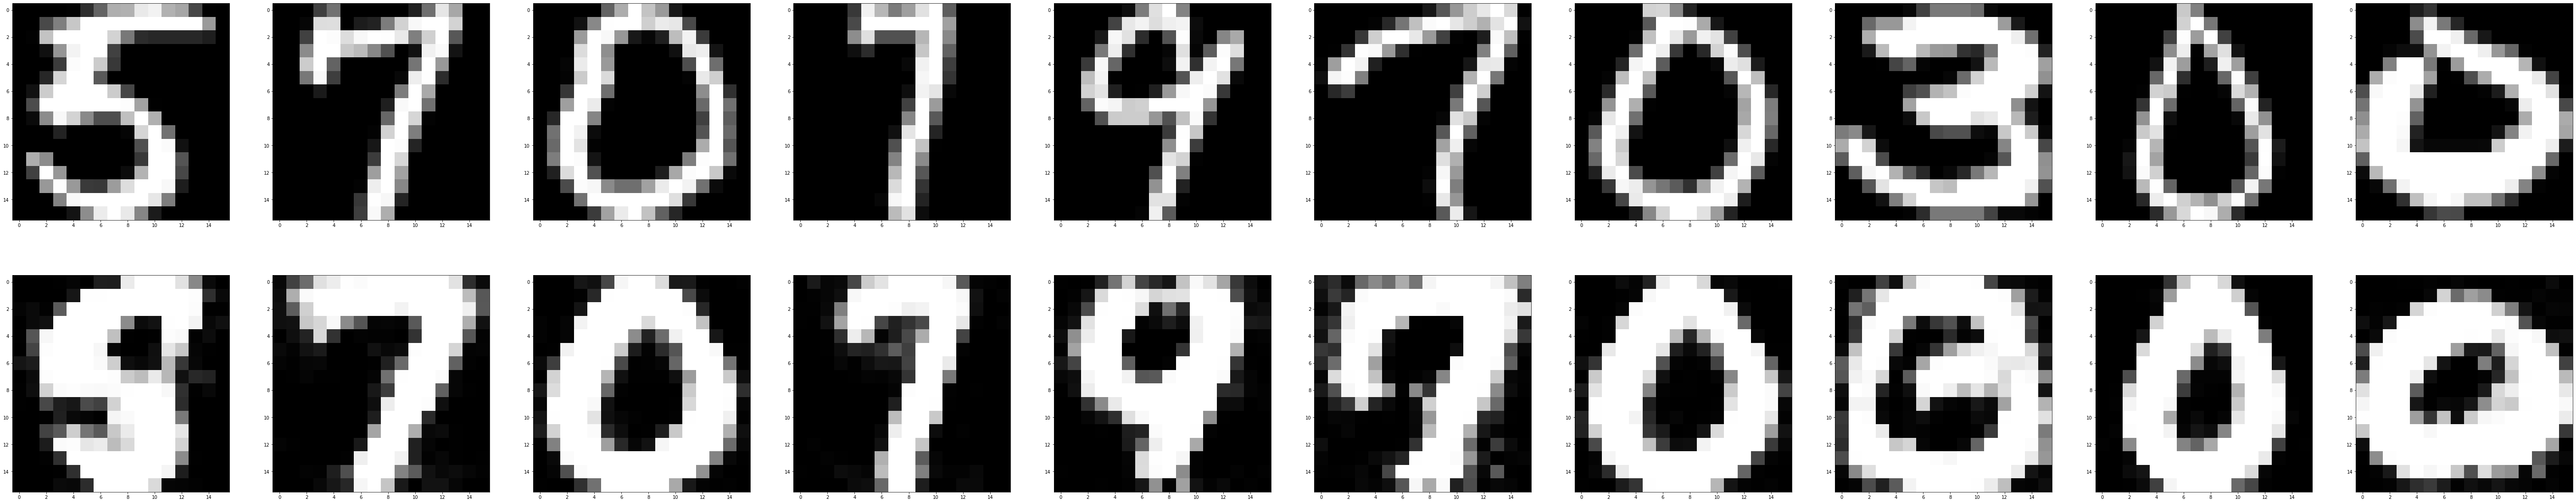

In [22]:
nb_examples = 10
index = np.random.choice(np.arange(alltestx.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps(alltestx[i])

    plt.subplot(2,10,j+10)
    ut.show_usps(optimiser._net.forward(np.asarray([alltestx[i]])))
    
    j+=1

### Variation de la taille du batch : 

In [27]:
input_size = alltrainx.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network = Sequentiel(auto_encodeur)


optimiser = Optim(network,loss,eps=1e-3)

print(optimiser._net)

In [28]:
batch_size = 50
epochs = 100

optimiser.SGD(alltrainx, alltrainx, batch_size, epochs)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


[-216.8670648941049,
 -358.44961451106803,
 -406.3725089668234,
 -434.0567302292391,
 -454.3423766109901,
 -469.7249553755463,
 -477.57059620481675,
 -490.5067988631827,
 -497.92950986072435,
 -503.09768325466604,
 -509.88364872143035,
 -507.55183046383013,
 -510.3763390759935,
 -507.8529805029379,
 -515.1002533017486,
 -520.1080528371834,
 -518.4594777786572,
 -518.4786642555774,
 -520.9078646970605,
 -514.8414281263823,
 -504.20623989562006,
 -508.92017337457645,
 -507.60364848949126,
 -497.0640874858491,
 -486.3143430797247,
 -470.16366122849377,
 -468.9810120007987,
 -443.34638069646707,
 -436.6815542334273,
 -443.5395361169573,
 -426.36775295212,
 -416.68029888191217,
 -403.1906913089673,
 -381.23198247385375,
 -370.4862641670736,
 -343.4713056937556,
 -329.1413952130507,
 -280.67891347725254,
 -252.60699895677712,
 -270.74195194191543,
 -242.80157192219585,
 -228.27762510305433,
 -230.96444502875138,
 -255.69676746419051,
 -234.84879725513676,
 -231.08927509913536,
 -246.06782543

#### Visualisation de le prediction des données Test 

In [26]:
alltestx.shape

(2007, 256)

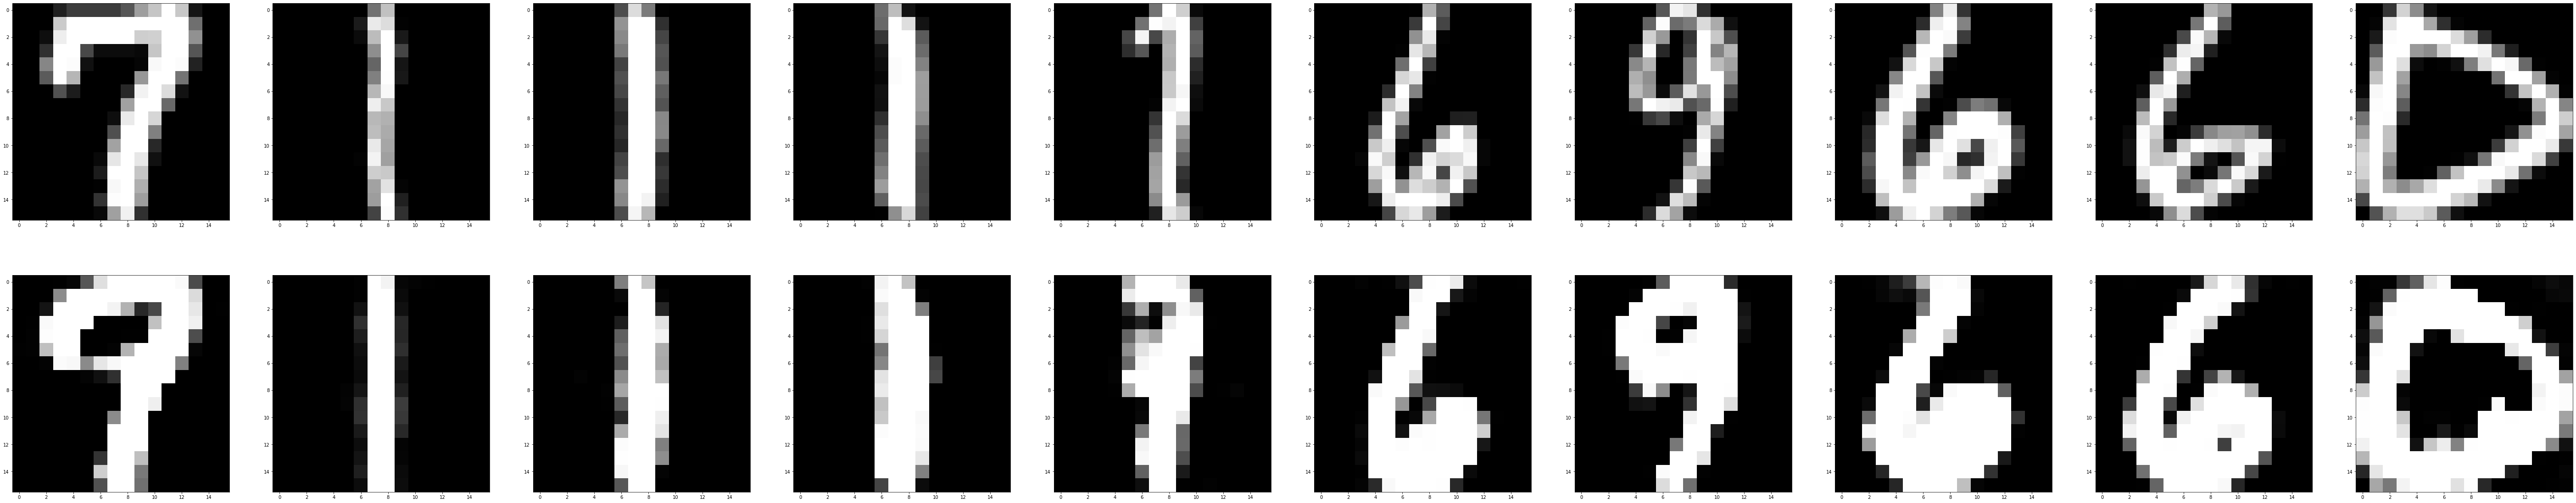

In [29]:
nb_examples = 10
index = np.random.choice(np.arange(alltestx.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps(alltestx[i])

    plt.subplot(2,10,j+10)
    ut.show_usps(optimiser._net.forward(np.asarray([alltestx[i]])))
    
    j+=1

### Variation du nombre d'epoch : 

In [30]:
input_size = alltrainx.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network = Sequentiel(auto_encodeur)


optimiser = Optim(network,loss,eps=1e-3)

print(optimiser._net)

In [31]:
batch_size = 10
epochs = 200

optimiser.SGD(alltrainx, alltrainx, batch_size, epochs)

epoch  0


epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
epoch  100
epoch  1

[-226.5419934323795,
 -361.5679851118689,
 -409.75144285649276,
 -436.9832399346601,
 -458.51741037373654,
 -473.5825740591382,
 -484.6711344224299,
 -494.1272864781711,
 -500.5795342884267,
 -507.5309753752859,
 -512.956308386498,
 -516.0950358846608,
 -518.9887855480076,
 -522.3982087476037,
 -527.1645152199387,
 -529.6464987876172,
 -528.0736212648217,
 -528.5106611584305,
 -531.3769942466868,
 -532.0116289124715,
 -536.1110321132053,
 -533.9051717677761,
 -525.1941970892198,
 -515.6321291212494,
 -509.1343276203191,
 -503.6062854888942,
 -503.91323885321617,
 -506.2265040901941,
 -504.81388565023633,
 -490.08567899863414,
 -470.5531857708112,
 -462.84576524133996,
 -445.5747553843472,
 -430.947652035667,
 -426.6097024385441,
 -401.0149621725855,
 -367.03826215779696,
 -369.57174841103284,
 -372.68888945642266,
 -369.12310755552016,
 -343.30197327815836,
 -353.42031119661954,
 -332.5915646363836,
 -325.0782218313155,
 -323.6733868790123,
 -306.90233684173904,
 -279.02372520495885,
 

#### Visualisation de le prediction des données Test 

In [ ]:
alltestx.shape

(2007, 256)

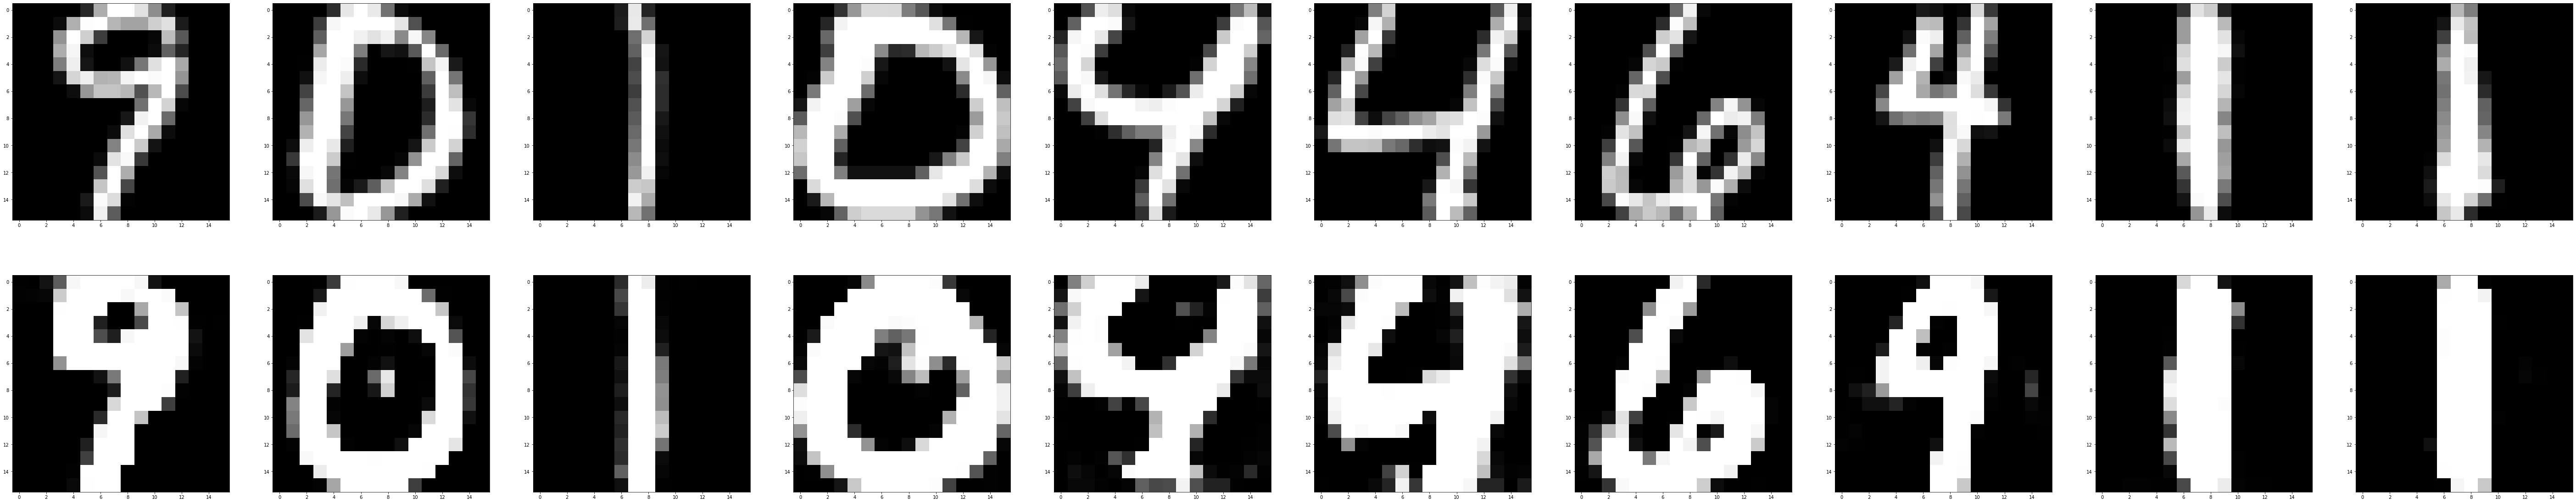

In [32]:
nb_examples = 10
index = np.random.choice(np.arange(alltestx.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps(alltestx[i])

    plt.subplot(2,10,j+10)
    ut.show_usps(optimiser._net.forward(np.asarray([alltestx[i]])))
    
    j+=1